<a href="https://colab.research.google.com/github/AsthmaticDonkey/Thesis/blob/master/OrbParalell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install pydicom

     |████████████████████████████████| 7.1MB 2.0MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def dicomToPNG(ds,start, end):
  for inum in range(start, end):
    img1= dicom_image_file_0.pixel_array[inum]
    image2 = plt.imshow(img1)
    plt.savefig('/content/drive/My Drive/ThesisData/body1/'+str(inum)+'.png')

def readPNG():
  for filename in os.listdir(r'/content/Anatomy'):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        b = gis.generate_signature(os.path.join(directory, filename))
        #print(gis.normalized_distance(a, b))
        if(gis.normalized_distance(a, b)<0.4):
            mlist.append([gis.normalized_distance(a, b),os.path.join(directory, filename)])

def runOrb(img1, img2, arr):
  dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

  # Convert the training image to RGB
  training_image = cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB)

  # Convert the training image to gray scale
  training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

  mlist = []
  for count in range(0,dicom_image_file_0.pixel_array.shape[0]-2):
    # Create test image by adding Scale Invariance and Rotational Invariance
    test_image = marr[count]
    #test_image = cv2.pyrDown(test_image)
    #test_image = cv2.pyrDown(test_image)
    num_rows, num_cols = test_image.shape[:2]


    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

    orb = cv2.ORB_create()

    train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # Create a Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the ORB descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)
    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    arr.append([marr[count], matches])



  numMatch = 0
  ind2 = 0
  ind3 = 0
  imm = []

  distances = []

  for i in mlist:
    #sumD = 0
    #for i2 in i[1]:
    #  sumD = sumD + i2.distance
    distances.append((len(i[1])))
    
  for i in distances:
    if(i > numMatch):
      numMatch = i
      ind3 = ind2
    ind2 = ind2+1


  plots[0].set_title(image1[1]+" image")
  plots[0].imshow(image1[0])

  plots[1].set_title("Found Image")
  plots[1].imshow(marr[ind3])

In [0]:
pip install pydicom

     |████████████████████████████████| 7.1MB 6.1MB/s 


In [0]:
pip install image-match

     |████████████████████████████████| 20.7MB 4.4MB/s 
     |████████████████████████████████| 61kB 24.1MB/s 
  Created wheel for image-match: filename=image_match-1.1.2-cp36-none-any.whl size=21229 sha256=1c61b960cdc6e1ab180f1d76e42004a91373bce520d8d6ba23d93f5b810bdb1f
  Stored in directory: /root/.cache/pip/wheels/31/a7/b6/cfa60a9034872415c1b49505b28f737014d77459ecb9e94e85
  Created wheel for scikit-image: filename=scikit_image-0.12.3-cp36-cp36m-linux_x86_64.whl size=26738585 sha256=cc88a992dcfc34b1644dfa152375ab6d482ec8cdec0a674b7b6a86fdc527f619
  Stored in directory: /root/.cache/pip/wheels/bc/98/ff/364a64db93b1909ecc2d1e75035ec56f27b5f53b4b31527fe1
Successfully built image-match scikit-image
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
from google.colab import drive
drive.mount('/content/drive')
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from image_match.goldberg import ImageSignature
import image_match
import cv2
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt, cm
from __future__ import division
import pydicom as DCM

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import logging
import threading
import time

def thread_function(name):
    logging.info("Thread %s: starting", name)
    
    logging.info("Thread %s: finishing", name)

def dicomToPNG(ds,start, end):
  for inum in range(start, end):
    img1= ds.pixel_array[inum]
    image2 = plt.imsave(('/content/drive/My Drive/ThesisData/body2/'+str(inum)+'.png'),img1)

def convertOtherAxis(ds,start, end):
  tformIm = []
  tformArr = []

  length1 = ds.pixel_array.shape[0]
  length2 = ds.pixel_array.shape[1]
  length3 = ds.pixel_array.shape[2]

  for inti2 in range(start,end):
    for inti1 in range(0,length1):
      tformIm.append(ds.pixel_array[inti1][inti2])
    tformArr.append(tformIm,inti2)
    tformIm = []

  for img in tformArr:
    image2 = plt.imsave(('/content/drive/My Drive/ThesisData/body2/y'+str(img[1])+'.png'),img[0])


def readPNG(arr,start, end):
  for inum in range(start, end):
    im1 = cv2.imread('/content/drive/My Drive/ThesisData/body2/'+str(inum)+'.png')
    arr[inum] = im1


marr=[]


if __name__ == "__main__":
    startt = time.time()
    dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')
    num = (int) (dicom_image_file_0.pixel_array.shape[0]/200)
    num2 = num-1
    x = []
    y = []
    z = []
    for inum in range(0,dicom_image_file_0.pixel_array.shape[0]):
      marr.append(0)
    
    dest = Path('/content/drive/My Drive/ThesisData/body2')
    dest.mkdir(parents=True, exist_ok=True)
    import shutil
    shutil.rmtree('/content/drive/My Drive/ThesisData/body2/')
    dest = Path('/content/drive/My Drive/ThesisData/body2')
    dest.mkdir(parents=True, exist_ok=True)       

    for i in range(0,(num-2)):
      start = i*200
      end = start+200
      if(i == (num-3)):
        end = dicom_image_file_0.pixel_array.shape[0] -1
      x.append(threading.Thread(target=dicomToPNG, args=(dicom_image_file_0, start,  end)))
      x[i].start()

    for i in range(0,(num-2)):
      x[i].join()

    #for i in range(0,3):
    #  start = (int) (i*(512/4))
    #  end = (int) ((i+1)*(512/4))
    #  z.append(threading.Thread(target=convertOtherAxis, args=(dicom_image_file_0, start,  end)))
    #  z[i].start()

    #for i in range(0,3):
    #  z[i].join()

    for i in range(0,(num-2)):
      start = i*200
      end = start+200
      if(i == (num-3)):
        end = dicom_image_file_0.pixel_array.shape[0] -1
      y.append(threading.Thread(target=readPNG, args=(marr, start,  end)))
      y[i].start()
      
    for i in range(0,(num-2)):
      y[i].join()
    endt = time.time()
    print(endt - startt)

/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


499.3705863952637


In [0]:


import logging
import threading
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from google.colab.patches import cv2_imshow

def thread_function(name):
    logging.info("Thread %s: starting", name)
    
    logging.info("Thread %s: finishing", name)

def dicomToPNG(ds,start, end):
  for inum in range(start, end):
    img1= ds.pixel_array[inum]
    image2 = plt.imsave(('/content/drive/My Drive/ThesisData/body2/'+str(inum)+'.png'),img1)


def readPNG(arr,start, end):
  for inum in range(start, end):
    im1 = cv2.imread('/content/drive/My Drive/ThesisData/body2/'+str(inum)+'.png')
    arr[inum] = im1

marr=[]


if __name__ == "__main__":
    
    dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')
    num = (int) (dicom_image_file_0.pixel_array.shape[0]/200)
    num2 = num-1
    y = []
    

    for inum in range(0,dicom_image_file_0.pixel_array.shape[0]):
      marr.append(0)

    for i in range(0,(num-2)):
      start = i*200
      end = start+200
      if(i == (num-3)):
        end = dicom_image_file_0.pixel_array.shape[0] -1
      y.append(threading.Thread(target=readPNG, args=(marr, start,  end)))
      y[i].start()
      
    for i in range(0,(num-2)):
      y[i].join()






/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


500


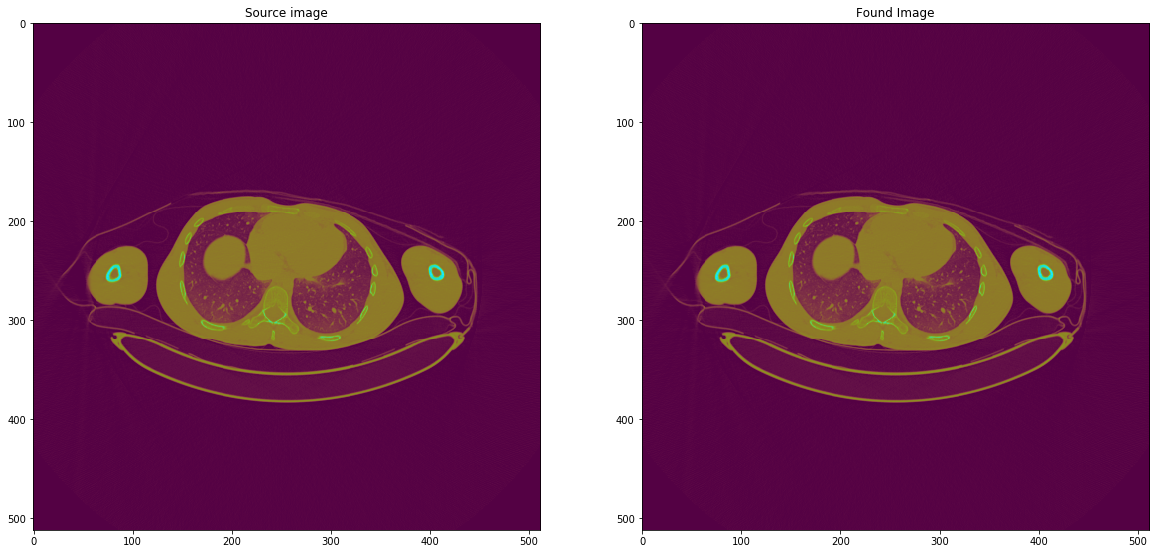

In [0]:
# Load the image
dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')
image1 = cv2.imread('/content/drive/My Drive/ThesisData/Test.png')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

mlist = []
for count in range(0,dicom_image_file_0.pixel_array.shape[0]-2):
  # Create test image by adding Scale Invariance and Rotational Invariance
  test_image = marr[count]
  #test_image = cv2.pyrDown(test_image)
  #test_image = cv2.pyrDown(test_image)
  num_rows, num_cols = test_image.shape[:2]


  test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

  orb = cv2.ORB_create()

  train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
  test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

  keypoints_without_size = np.copy(training_image)
  keypoints_with_size = np.copy(training_image)

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

  cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


  # Create a Brute Force Matcher object.
  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

  # Perform the matching between the ORB descriptors of the training image and the test image
  matches = bf.match(train_descriptor, test_descriptor)

  # The matches with shorter distance are the ones we want.
  matches = sorted(matches, key = lambda x : x.distance)
  result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

  mlist.append([marr[count], matches])



numMatch = 0
ind2 = 0
ind3 = 0
imm = []

distances = []

for i in mlist:
  #sumD = 0
  #for i2 in i[1]:
  #  sumD = sumD + i2.distance
  distances.append((len(i[1])))


for i in distances:
  if(i > numMatch):
    numMatch = i
    ind3 = ind2
  ind2 = ind2+1

fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Source image")
plots[0].imshow(image1)

plots[1].set_title("Found Image")
plots[1].imshow(marr[ind3])
print(ind3)

In [0]:
tformIm = []
tformArr = []

length1 = dicom_image_file_0.pixel_array.shape[0]
length2 = dicom_image_file_0.pixel_array.shape[1]
length3 = dicom_image_file_0.pixel_array.shape[2]

for inti2 in range(0,length2):
  for inti1 in range(0,length1):
    tformIm.append(dicom_image_file_0.pixel_array[inti1][inti2])
  tformArr.append(tformIm)
  tformIm = []


for img in tformArr:
  image2 = plt.imsave(('/content/drive/My Drive/ThesisData/body2/y'+str(inum)+'.png'),img)

In [0]:
testimg = []
for filename in sorted(os.listdir(r'/content/drive/My Drive/ThesisData/testImages')):
    if filename.endswith(".jpg") or filename.endswith(".png"):
      image1 = cv2.imread('/content/drive/My Drive/ThesisData/testImages/'+filename)
      testimg.append([image1, filename])

for image1 in testimg:
  # Load the image
  dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

  # Convert the training image to RGB
  training_image = cv2.cvtColor(image1[0], cv2.COLOR_BGR2RGB)

  # Convert the training image to gray scale
  training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

  mlist = []
  for count in range(0,dicom_image_file_0.pixel_array.shape[0]-2):
    # Create test image by adding Scale Invariance and Rotational Invariance
    test_image = marr[count]
    #test_image = cv2.pyrDown(test_image)
    #test_image = cv2.pyrDown(test_image)
    num_rows, num_cols = test_image.shape[:2]


    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

    orb = cv2.ORB_create()

    train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # Create a Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the ORB descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)
    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    mlist.append([marr[count], matches])



  numMatch = 0
  ind2 = 0
  ind3 = 0
  imm = []

  distances = []

  for i in mlist:
    #sumD = 0
    #for i2 in i[1]:
    #  sumD = sumD + i2.distance
    distances.append((len(i[1])))
    
  for i in distances:
    if(i > numMatch):
      numMatch = i
      ind3 = ind2
    ind2 = ind2+1


  plots[0].set_title(image1[1]+" image")
  plots[0].imshow(image1[0])

  plots[1].set_title("Found Image")
  plots[1].imshow(marr[ind3])

/usr/local/lib/python3.6/dist-packages/pydicom/filereader.py:313: UserWarning: Expected explicit VR, but found implicit VR - using implicit VR for reading
  warnings.warn(message, UserWarning)


KeyboardInterrupt: ignored

In [0]:
def runOrb(start, end, marr, outarr, img):
  dicom_image_file_0 = DCM.read_file('/content/drive/My Drive/ThesisData/Body1.dcm')

  # Convert the training image to RGB
  training_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Convert the training image to gray scale
  training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

  mlist = []
  for count in range(start,end):
    # Create test image by adding Scale Invariance and Rotational Invariance
    test_image = marr[count]
    #test_image = cv2.pyrDown(test_image)
    #test_image = cv2.pyrDown(test_image)
    num_rows, num_cols = test_image.shape[:2]


    test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

    orb = cv2.ORB_create()

    train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
    test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

    keypoints_without_size = np.copy(training_image)
    keypoints_with_size = np.copy(training_image)

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

    cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


    # Create a Brute Force Matcher object.
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

    # Perform the matching between the ORB descriptors of the training image and the test image
    matches = bf.match(train_descriptor, test_descriptor)

    # The matches with shorter distance are the ones we want.
    matches = sorted(matches, key = lambda x : x.distance)
    result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

    outarr[count] = [marr[count], matches]

In [0]:
import logging
import threading
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from google.colab.patches import cv2_imshow



marr=[]


if __name__ == "__main__":
  
  img = cv2.imread('/content/drive/My Drive/ThesisData/Test.png')
  
  numMatch = 0
  ind2 = 0
  ind3 = 0
  imm = []

  distances = []
  for i in range(0,(num-2)):
    start = i*200
    end = start+200
    if(i == (num-3)):
      end = dicom_image_file_0.pixel_array.shape[0] -1
    y.append(threading.Thread(target=readPNG, args=(start,  end, marr, distances, img)))
    y[i].start()
  
  for i in range(0,(num-2)):
    y[i].join()

  for i in mlist:
    distances.append((len(i[1])))
    
  for i in distances:
    if(i > numMatch):
      numMatch = i
      ind3 = ind2
    ind2 = ind2+1


  plots[0].set_title(image1[1]+" image")
  plots[0].imshow(image1[0])

  plots[1].set_title("Found Image")
  plots[1].imshow(marr[ind3])





